# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=" + unit + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saratamata
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | nikolayevsk-on-amure
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 14 of Set 1 | balqash
Processing Record 15 of Set 1 | tobruk
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | matai
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | al matlin
Processing Record 21 of Set 1 | turpan
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [24]:
#Display recound count
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        555 non-null    object 
 1   Lat         555 non-null    float64
 2   Lng         555 non-null    float64
 3   Max Temp    555 non-null    float64
 4   Humidity    555 non-null    int64  
 5   Cloudiness  555 non-null    int64  
 6   Wind Speed  555 non-null    float64
 7   Country     555 non-null    object 
 8   Date        555 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.2+ KB


In [7]:
# Display sample data (1-10)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,1.81,75,20,1.03,AR,1693471038
1,anadyr,64.7500,177.4833,11.28,81,0,6.00,RU,1693470700
2,nikolayevsk-on-amure,53.1406,140.7300,15.43,92,100,1.20,RU,1693471039
3,port-aux-francais,-49.3500,70.2167,3.07,88,91,18.89,TF,1693471039
4,namibe,-15.1961,12.1522,22.31,74,25,3.80,AO,1693471039
5,waitangi,-43.9535,-176.5597,10.46,82,0,1.34,NZ,1693471040
6,blackmans bay,-43.0167,147.3167,9.18,75,19,5.18,AU,1693471040
7,arraial do cabo,-22.9661,-42.0278,16.98,100,0,1.54,BR,1693470917
8,broken hill,-31.9500,141.4333,12.44,55,5,4.65,AU,1693471040
9,adamstown,-25.0660,-130.1015,20.81,78,99,6.57,PN,1693471041


In [9]:
# Export the City_Data into a csv
#Encoding value 'utf-8': used to store specific information
city_data_df.to_csv("cities.csv", encoding='utf-8')

#Display the city weather dataframe
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,1.81,75,20,1.03,AR,1693471038
1,anadyr,64.7500,177.4833,11.28,81,0,6.00,RU,1693470700
2,nikolayevsk-on-amure,53.1406,140.7300,15.43,92,100,1.20,RU,1693471039
3,port-aux-francais,-49.3500,70.2167,3.07,88,91,18.89,TF,1693471039
4,namibe,-15.1961,12.1522,22.31,74,25,3.80,AO,1693471039
5,waitangi,-43.9535,-176.5597,10.46,82,0,1.34,NZ,1693471040
6,blackmans bay,-43.0167,147.3167,9.18,75,19,5.18,AU,1693471040
7,arraial do cabo,-22.9661,-42.0278,16.98,100,0,1.54,BR,1693470917
8,broken hill,-31.9500,141.4333,12.44,55,5,4.65,AU,1693471040
9,adamstown,-25.0660,-130.1015,20.81,78,99,6.57,PN,1693471041


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

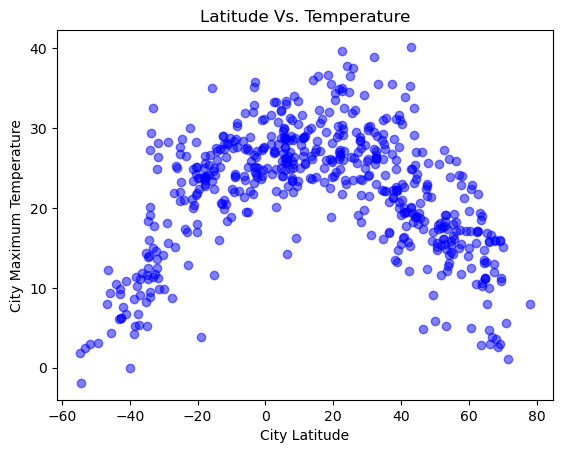

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c='b', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Maximum Temperature')
plt.title('Latitude Vs. Temperature')

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

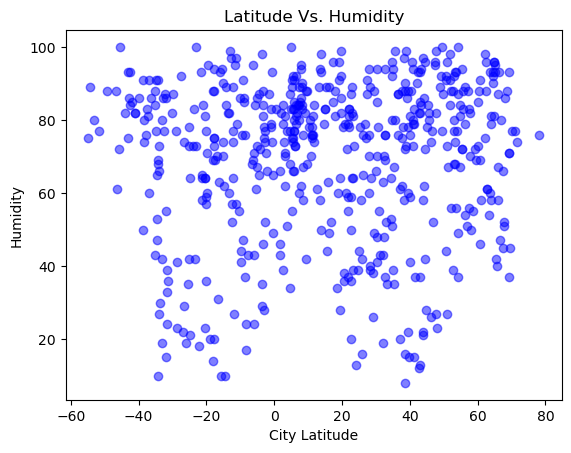

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='b', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

# Save the figure
#plt.savefig("output_data/Fig2.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

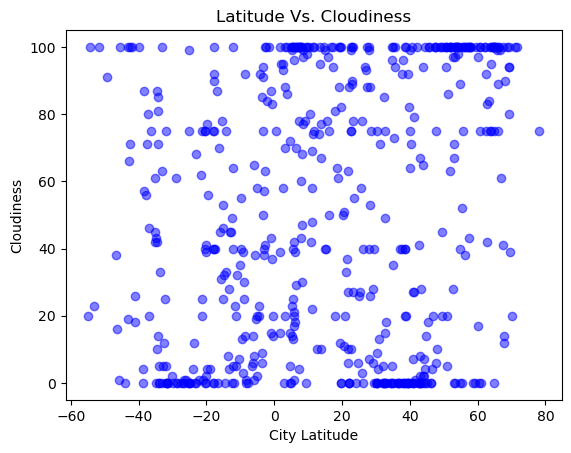

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c='b', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')

# Save the figure
# plt.savefig("Output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

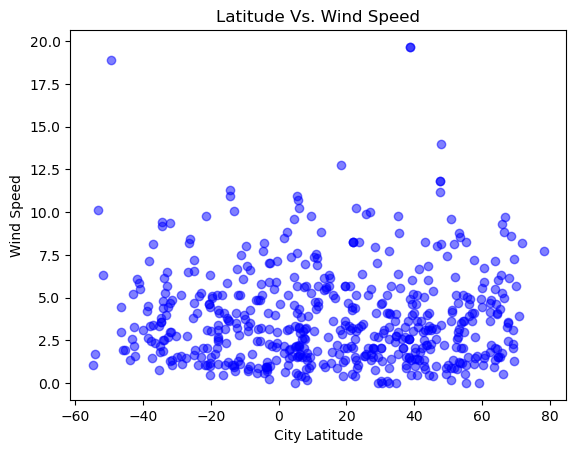

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c='b', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed')

# Save the figure
# plt.savefig("Output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='g',alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.xlabel('Latitude')
    plt.ylabel(y_title)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Northern_Hemisphere_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
Northern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,anadyr,64.7500,177.4833,11.28,81,0,6.00,RU,1693470700
2,nikolayevsk-on-amure,53.1406,140.7300,15.43,92,100,1.20,RU,1693471039
10,kailua-kona,19.6406,-155.9956,28.11,86,0,5.66,US,1693471041
11,balqash,46.8481,74.9950,18.33,52,20,8.00,KZ,1693471042
12,tobruk,32.0836,23.9764,27.41,63,0,4.10,LY,1693471042


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_Hemisphere_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
Southern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,1.81,75,20,1.03,AR,1693471038
3,port-aux-francais,-49.3500,70.2167,3.07,88,91,18.89,TF,1693471039
4,namibe,-15.1961,12.1522,22.31,74,25,3.80,AO,1693471039
5,waitangi,-43.9535,-176.5597,10.46,82,0,1.34,NZ,1693471040
6,blackmans bay,-43.0167,147.3167,9.18,75,19,5.18,AU,1693471040


###  Temperature vs. Latitude Linear Regression Plot

### Linear Relationships:
###### r-values are calculated in scatter-plot graphs
###### Scatter-plot graphs: show the relationship between two "quantitative" variables.
###### r > 0: indicates a positive correaltion
###### r < 0: indicates a negative correlation
###### Values of r near 0: weak linear relationship and vice versa (-1 to 1)

The r-value is: -0.691301400604954


Text(0.5, 1.0, 'Temperature Vs. Latitude: Northern Hemisphere')

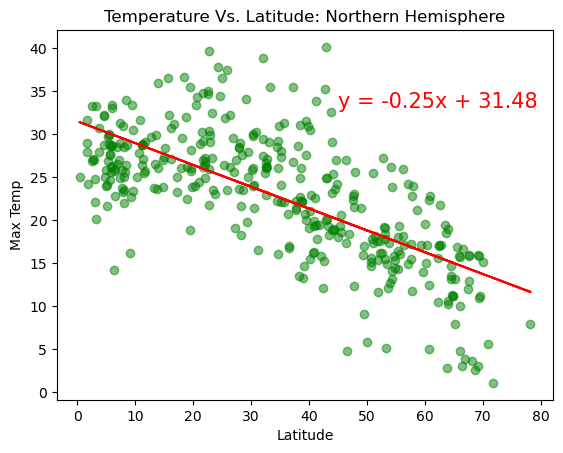

In [26]:
# Linear regression on Northern Hemisphere
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temperature', (45,33))
plt.ylabel('Max Temp')
plt.title('Temperature Vs. Latitude: Northern Hemisphere')

The r-value is: 0.7795980598067768


Text(0.5, 1.0, 'Temperature Vs. Latitude: Southern Hemisphere')

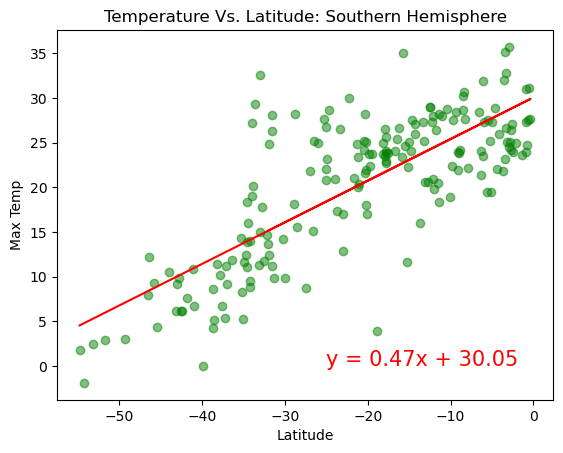

In [21]:
# Linear regression on Southern Hemisphere
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temperature', (-25,0))
plt.ylabel('Max Temp')
plt.title('Temperature Vs. Latitude: Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere
- The calculated r-value is -0.6913 for the variables pertaining to "Latitude and Maximum Temperature". Furthermore, the calculated r-value reflects a strong negative relationship.

Southern Hemisphere

- The calculated r-value is 0.7796 for the variables pertaining to "Latitude and Maximum Temperature". Furthermore, the calculated r-value reflects a strong positive relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.016572489076171634


Text(0.5, 1.0, 'Humidity Vs. Latitude: Northern Hemisphere')

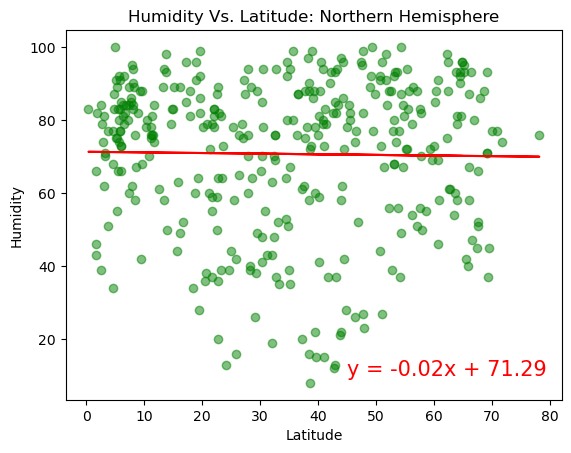

In [40]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (45,10))
plt.ylabel('Humidity')
plt.title('Humidity Vs. Latitude: Northern Hemisphere')

The r-value is: -0.07203763551735211


Text(0.5, 1.0, 'Humidity Vs. Latitude: Southern Hemisphere')

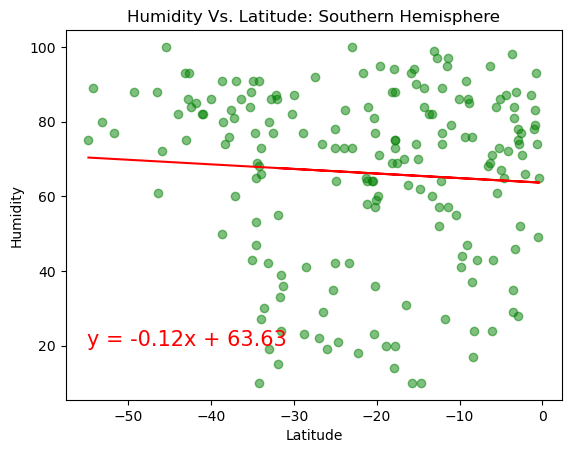

In [46]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (-55,20))
plt.ylabel('Humidity')
plt.title('Humidity Vs. Latitude: Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere

- The calculated r-value is -0.0166 for the variables pertaining to "Latitude and Humidity". Furthermore, the calculated r-value reflects a very weak negative relationship.

Southern Hemisphere

- The calculated r-value is -0.0720 for the variables pertaining to "Latitude and Humidity". Furthermore, the calculated r-value reflects a very weak negative relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08524161539273871


Text(0.5, 1.0, 'Cloudiness Vs. Latitude: Northern Hemisphere')

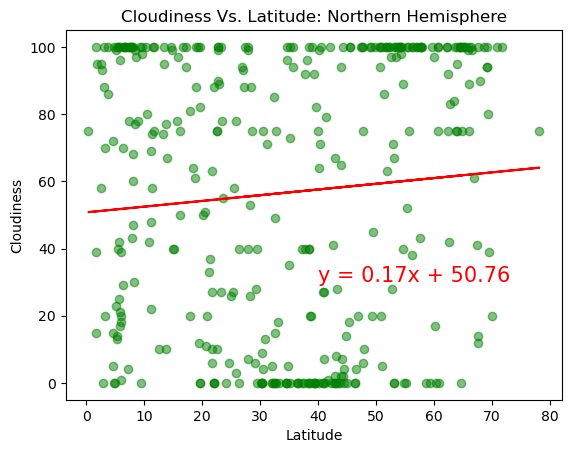

In [42]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,30))
plt.ylabel('Cloudiness')
plt.title('Cloudiness Vs. Latitude: Northern Hemisphere')

The r-value is: -0.02959668793540668


Text(0.5, 1.0, 'Cloudiness Vs. Latitude: Southern Hemisphere')

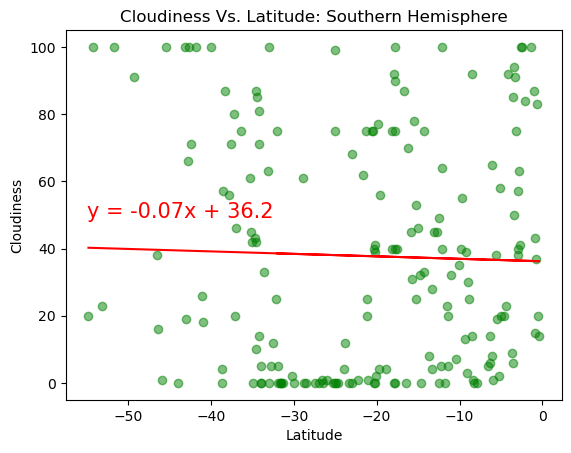

In [52]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,49))
plt.ylabel('Cloudiness')
plt.title('Cloudiness Vs. Latitude: Southern Hemisphere')

**Discussion about the linear relationship:**

Northern Hemisphere

- The calculated r-value is 0.0852 for the variables pertaining to "Latitude and Cloudiness". Furthermore, the calculated r-value reflects a very weak positive relationship.

Southern Hemisphere

- The calculated r-value is -0.0296 for the variables pertaining to "Latitude and Cloudiness". Furthermore, the calculated r-value reflects a very weak negative relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03262541726217346


Text(0.5, 1.0, 'Wind Speed Vs. Latitude: Northern Hemisphere')

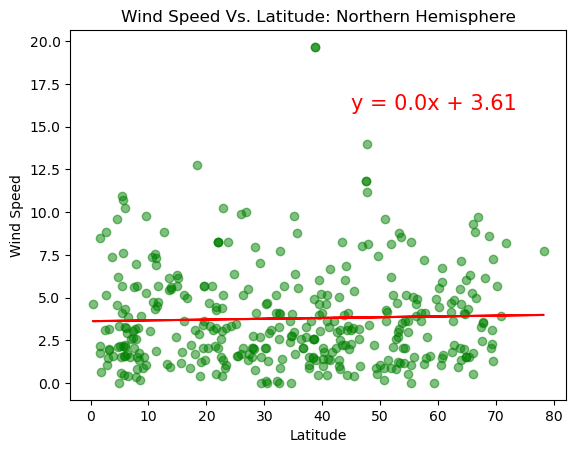

In [54]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (45,16))
plt.ylabel('Wind Speed')
plt.title('Wind Speed Vs. Latitude: Northern Hemisphere')

The r-value is: -0.11828587436744772


Text(0.5, 1.0, 'Wind Speed Vs. Latitude: Southern Hemisphere')

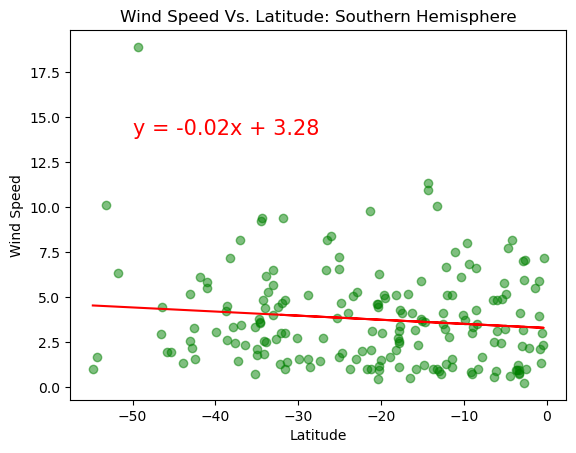

In [56]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50,14))
plt.ylabel('Wind Speed')
plt.title('Wind Speed Vs. Latitude: Southern Hemisphere')

**Discussion about the linear relationship:**

Northern Hemisphere

- The calculated r-value is 0.0326 for the variables pertaining to "Latitude and Cloudiness". Furthermore, the calculated r-value reflects a very weak positive relationship.

Southern Hemisphere

- The calculated r-value is -0.1182 for the variables pertaining to "Latitude and Cloudiness". Furthermore, the calculated r-value reflects a very weak negative relationship.